# Integral

Let $P$ be a **partition** of a segment $[a, b]$:

$$
    a = x_0 < x_1 < \ldots < x_{n-1} < x_n = b,
$$

and $\xi_k \in [x_{k-1}, x_k]$, $k=1, \ldots, n$.

Denote $d(P) = \max\limits_{1 \leqslant k \leqslant n} (x_k - x_{k-1})$.
**Riemann integral** of a function $f \in C[a, b]$ is a limit of **Riemann sums**

$$
    \int\limits_a^b f(x)\,dx = \lim\limits_{d(P) \to 0} \sum\limits_{k=1}^n f(\xi_k)(x_k - x_{k-1}).
$$

```{figure} https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7EK-9NhUrurxOjsNDibgnSX5NX6ldaOUyTg&s
:align: center
```

Each summand in a Riemann sum represents an area of a thin rectangle with height $f(\xi_k)$. Therefore, the integral $\int\limits_a^b f(x)\,dx$ equals area under the graph $y = f(x)$.

```{figure} https://images.nagwa.com/figures/explainers/279131484389/1.svg
:align: center
```

## Rules of integration

**Integraion by parts**: if $f, g \in C^1[a,b]$ then

$$
    \int\limits_a^b f(x) g'(x)\, dx = \left.f(x)g(x)\right|_a^b - \int\limits_a^b f'(x) g(x)\, dx.
$$

**Change of variable**: if $\varphi \in C^1[a, b]$ is a monotonic function, $\varphi([\alpha, \beta]) = [a, b]$, then

$$
    \int\limits_a^b f(x) \, dx =  \int\limits_\alpha^\beta f(\varphi(t)) \varphi'(t)\, dt.
$$

```{admonition} Fundamental theorem of calculus
:class: important
If $f' \in C[a, b]$ then

$$
    \int\limits_a^b f'(x)\,dx = f(b) - f(a).
$$

In other words,

$$
    \int\limits_a^b g(x)\,dx = G(b) - G(a)
$$

where $G$ is antiderivative of $g$.
```

## Improper integrals

If $f \in C[a, b]$ for all $b > a$ then **improper integral** over $[a, +\infty)$ is defined as 

$$
    \int\limits_a^{+\infty} f(x)\,dx = \lim\limits_{b\to +\infty}\int\limits_a^b f(x)\,dx 
$$

if this limit does exist. In such case improper integral is called **convergent**, otherwise — **divergent**.

Fundamental theorem of calculus also works for convergent integrals. For example,

$$
    \int\limits_0^{+\infty} e^{-x}\, dx = \left. -e^{-x} \right|_0^{+\infty} = 1 - 0 = 1
$$

(here we use property $e^{-\infty} \equiv \lim\limits_{t\to +\infty} e^{-t} = 0$.)

## Gamma function

The **gamma function** $\Gamma(\alpha)$, $\alpha > 0$, is defined as

$$
    \Gamma(\alpha) = \int\limits_0^{+\infty} x^{\alpha -1} e^{-x}\,dx.
$$

**Properties of gamma function**:

* $\Gamma(n) = (n-1)!$ if $n\in\mathbb N$
* $\Gamma(\alpha + 1) = \alpha \Gamma(\alpha)$ if $\alpha > 0$
* $\Gamma(\alpha) \Gamma(1 - \alpha) = \frac \pi{\sin\pi\alpha}$ if $0 < \alpha < 1$ (**complement formula**)
* Gamma function is positive and stricty convex
* Gamma function is infinitely differentiable and

    $$
    \Gamma^{(n)}(\alpha) = \int\limits_0^{+\infty}  x^{\alpha -1} e^{-x}\ln^n x\,dx
    $$

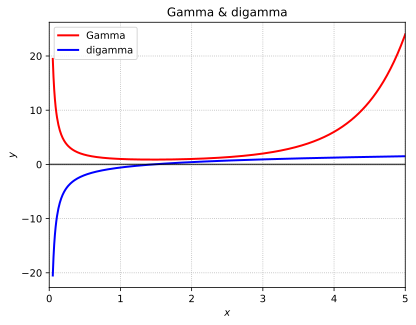

In [4]:
import matplotlib.pyplot as plt
from scipy.special import gamma, digamma
import numpy as np

%config InlineBackend.figure_format = 'svg'

def plot_gamma(x_min=0.05, x_max=5):
    xs = np.linspace(x_min, x_max, 501)
    plt.plot(xs, gamma(xs), lw=2, c='r', label="Gamma")
    plt.plot(xs, digamma(xs), lw=2, c='b', label="digamma")
    plt.xlim(0, x_max)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.axhline(color="k", alpha=0.7)
    plt.legend()
    plt.grid(ls=":")
    plt.title("Gamma & digamma");

plot_gamma()

The log derivative of gamma function is called **digamma function**:

$$
    \psi(\alpha) = (\log\Gamma(\alpha))' = \frac{\Gamma'(\alpha)}{\Gamma(\alpha)}.
$$

Digamma function also can be represented as

$$
    \psi(\alpha) = -\gamma + \int\limits_0^1 \frac{1 - t^{\alpha -1}}{1-t}\, dt = -\gamma + \sum\limits_{n=1}^{\infty}\Big(\frac 1n - \frac 1{n + \alpha - 1}\Big)
$$

where $\gamma$ is [Euler—Mascheroni constant](https://en.wikipedia.org/wiki/Euler%27s_constant).

## Beta function

The **beta function** is defined as

$$
B(p, q) = \int\limits_0^1 x^{p-1} (1-x)^{q-1}\,dx = \int\limits_0^{+\infty} \frac{t^{p-1}\,dt}{(1 + t)^{p + q}}, \quad p, q > 0.
$$

Beta function is symmetric: $B(p, q) = B(q, p)$. Also, it can be expressed in terms of gamma function:

$$
    B(p, q) = \frac{\Gamma(p)\Gamma(q)}{\Gamma(p + q)}.
$$

In [11]:
import numpy as np
import plotly.graph_objs as go
from scipy.special import beta

def plot_beta():
    # Define the range of x and y
    x = np.linspace(0.05, 4, 100)  # Avoid x = 0 to prevent division by zero
    y = np.linspace(0.05, 4, 100)
    X, Y = np.meshgrid(x, y)

    # Compute the Beta function for each pair of (x, y)
    Z = beta(X, Y)

    # Create a surface plot
    surface = go.Surface(x=X, y=Y, z=Z, colorscale='Greens')

    # Define the layout
    layout = go.Layout(
        title='Beta Function Surface Plot',
        scene=dict(
            xaxis_title='p',
            yaxis_title='q',
            zaxis_title='Beta(p, q)'
        )
    )

    # Create the figure and show it
    fig = go.Figure(data=[surface], layout=layout)
    fig.show()

plot_beta()

## Exercises

1. Calculate $\int\limits_0^1 \ln x\,dx$.

2. Prove that $\Gamma(n) = (n-1)!$ if $n\in\mathbb N$.

3. Using the complement formula, find $\Gamma(1/2)$.

4. Show that $\Gamma(n + \frac 12) = \frac{(2n-1)!!}{2^n}\sqrt \pi$ if $n\in \mathbb N$.

5. Calculate the **Poisson integral** $\int\limits_0^{+\infty} e^{-x^2}\, dx$. 

6. Find $\Gamma'(1)$ using expansion of digamma function.

7. Calculate $\int\limits_0^{\frac \pi 2} \sin^n x\,dx$.